Line 1: (0,0.9698) (1,0.0876)


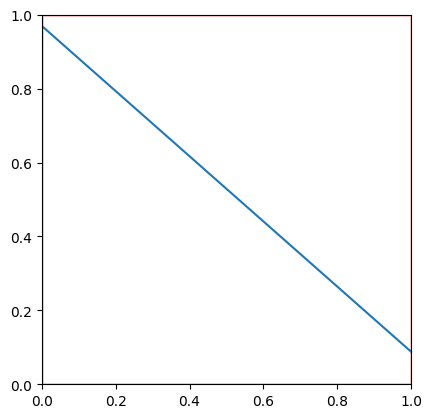

Vertex: (0.0,0.0)
Vertex: (1.0,0.0)
Vertex: (1.0,1.0)
Vertex: (0.0,1.0)
Vertex: (0,0.9698)
Vertex: (1,0.0876)


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


# Matplotlib stuff
fig, ax=plt.subplots(1)

square = patches.Rectangle((0.0, 0.0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(square)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Vertex class (for polygon class)
class Vertex:
    def __init__(self, x, y):
        self.x=x
        self.y=y
    def compareX(self, other):
        if self.x > other.x:
            return 1
        elif self.x < other.x:
            return -1
        else:
            return 0
    def compareY(self, other):
        if self.y > other.y:
            return 1
        elif self.y < other.y:
            return -1
        else:
            return 0

vertices = []
corners = [
    Vertex(0.0, 0.0),
    Vertex(1.0, 0.0),
    Vertex(1.0, 1.0),
    Vertex(0.0, 1.0)
]
vertices.append(corners[0])
vertices.append(corners[1])
vertices.append(corners[2])
vertices.append(corners[3])

# Line class (digits are number of decimal places)
digits=4
class Line:
    def __init__(self):
        if(random.randint(1,10) % 2==0):
            y1 = np.round(random.random(), digits)
            y2 = np.round(random.random(), digits)
            self.v1 = Vertex(0, y1)
            self.v2 = Vertex(1, y2)
            vertices.append(self.v1)
            vertices.append(self.v2)
        else:
            x1 = np.round(random.random(), digits)
            x2 = np.round(random.random(), digits)
            self.v1 = Vertex(x1, 0)
            self.v2 = Vertex(x2, 1)
            vertices.append(self.v1)
            vertices.append(self.v2)
        self.x = [self.v1.x, self.v2.x]
        self.y = [self.v1.y, self.v2.y]
        self.p1 = [self.v1.x, self.v1.y]
        self.p2 = [self.v2.x, self.v2.y]
    def __str__(self):
        return f"({self.v1.x},{self.v1.y}) ({self.v2.x},{self.v2.y})"
    def intersect(self, other):
        # Use vertex coordinates for calculations
        x1, y1 = self.v1.x, self.v1.y
        x2, y2 = self.v2.x, self.v2.y
        ox1, oy1 = other.v1.x, other.v1.y
        ox2, oy2 = other.v2.x, other.v2.y

        # Avoid division by zero for vertical lines
        if x2 == x1 or ox2 == ox1:
            print("Vertical line detected, skipping intersection calculation.")
            return

        slope1 = (y2 - y1) / (x2 - x1)
        slope2 = (oy2 - oy1) / (ox2 - ox1)
        yint1 = (slope1 * (0 - x1)) + y1
        yint2 = (slope2 * (0 - ox1)) + oy1
        yint = yint1 - yint2
        slope = slope2 - slope1
        if slope == 0:
            print("Lines are parallel, no intersection.")
            return
        interX = np.round((yint / slope), digits)
        interY = np.round((slope1 * interX) + yint1, digits)
        self.inter=Vertex(interX, interY)
        vertices.append(self.inter)
        print(f"Intercept: ({interX},{interY})")
        if 0.0 < interX < 1.0 and 0.0 < interY < 1.0:
            print("Intersection within unit square")
        else:
            print("Intersection not in unit square")

def create_lines(n):
    lines = []
    for idx in range(n):
        line = Line()
        print(f"Line {idx+1}: {line}")
        lines.append(line)
    return lines


lines = create_lines(1)

for line in lines:
    plt.plot(line.x, line.y)

plt.show()

for i in range(0, len(lines)-1):
    for j in range(i+1, len(lines)):
        lines[i].intersect(lines[j])


for vertex in vertices:
    print(f"Vertex: ({vertex.x},{vertex.y})")


In [66]:
from scipy.spatial import ConvexHull

class Polygon:
    def __init__(self, vertices):
        self.vertices=vertices

        @staticmethod
        def from_vertices(vertices):
            # This is a placeholder for a polygon construction algorithm.
            # For a full solution, you would need to implement a planar graph traversal
            # or use a computational geometry library to find all simple polygons.
            # Here, we just create a single polygon from the convex hull as an example.

            points = np.array([[v.x, v.y] for v in vertices])
            hull = ConvexHull(points)
            hull_vertices = [vertices[i] for i in hull.vertices]
            return Polygon(hull_vertices)

    



https://stackoverflow.com/questions/375471/how-can-i-form-polygons-from-lines?rq=3

make intersections create new lines?